In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.1 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [7]:
# import functions from modsim

from modsim import *
import numpy as np

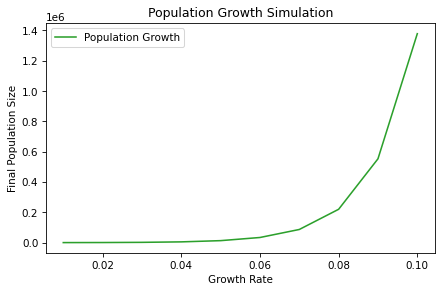

In [15]:
import matplotlib.pyplot as plt
from numpy import linspace
from modsim import State, TimeSeries, decorate

def run_population_simulation(growth_rate, num_steps):
    state = State(population=100)
    results = TimeSeries()

    for i in range(num_steps):
        state.population *= (1 + growth_rate)
        results[i] = state.population

    return results

# Sweep through different growth rates
growth_rates = linspace(0.01, 0.1, 10)
num_steps = 100

# Create a SweepSeries to store results
population_sweep = SweepSeries()

# Run simulations for different growth rates
for growth_rate in growth_rates:
    final_population = run_population_simulation(growth_rate, num_steps)
    population_sweep[growth_rate] = final_population.iloc[-1]

# Plot the results
population_sweep.plot(label='Population Growth', color='C2')

# Decorate the plot
decorate(title='Population Growth Simulation',
         xlabel='Growth Rate',
         ylabel='Final Population Size')

# Show the plot
plt.show()
